      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

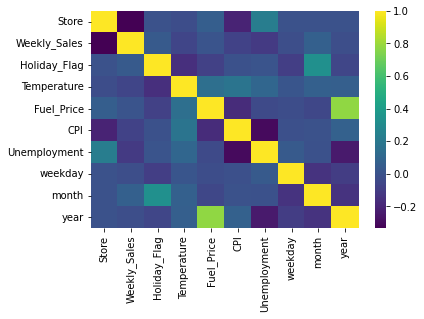

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV





data=pd.read_csv("https://raw.githubusercontent.com/uvanshankarsj/walmart/main/Walmart.csv")
print(data)
data['Date']=pd.to_datetime(data['Date'])

data['weekday'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year
data.drop(['Date'], axis=1)

store=[]
max=[]
print("null value  check")
print(data.isna().sum())
correlation=data.corr()
sns.heatmap(correlation, yticklabels=True, cmap="viridis");#2nd Row
print("from above table the weekly_sales is more afftected by the location")

revenue=data[['Store','Weekly_Sales']].groupby('Store').sum()
print("revenue in ascending")
print(revenue.sort_values(by=['Weekly_Sales']))

for i in range(45):
  store.append(data.loc[data['Store']==i])
  max.append(store[i]['Weekly_Sales'].max())
  correlation=store[i].corr()
  # print("from above table the weekly_sales is more afftected by the Holiday status")
  # print(correlation['Temperature'].iloc[1:2].values)
  plt.scatter(store[i]['Store'],store[i]['Weekly_Sales'],color='red')
plt.show()

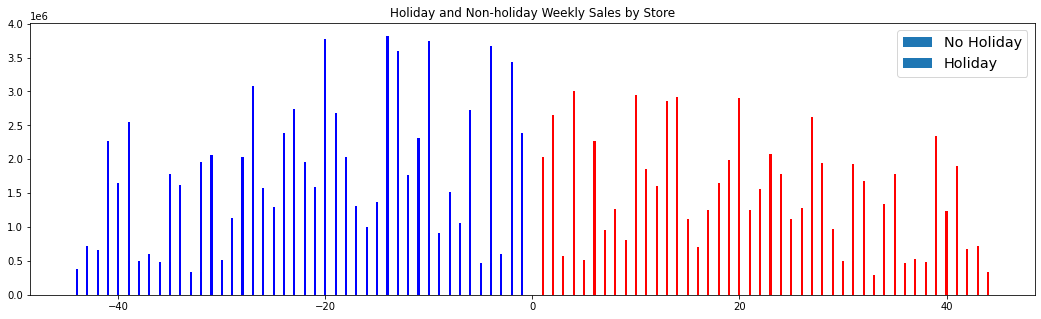

In [ ]:
plt.figure(figsize = (18,5))
plt.title('Holiday and Non-holiday Weekly Sales by Store')
# x needs to be an integer so we can do a side by side chart
for i in range(45):
  x = np.arange(len(store[1].Store.unique())) 
  plt.bar(x - i, store[i][store[i].Holiday_Flag == 0].Weekly_Sales, width=.2, label='No holiday',color='blue')
  plt.bar(x + i, store[i][store[i].Holiday_Flag == 1].Weekly_Sales, width=.2, label='Holiday',color='red')
  plt.legend(['No Holiday', 'Holiday'], fontsize='x-large')
plt.show()

# Visualisation:

from above table the weekly_sales is more afftected by the location
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85

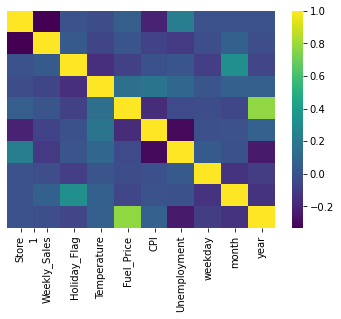

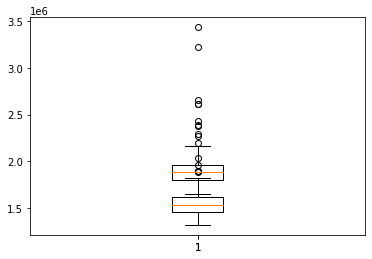

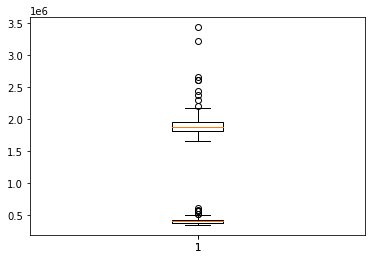

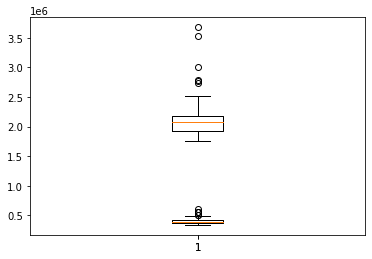

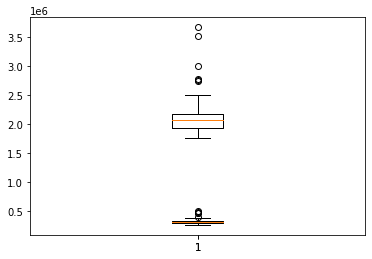

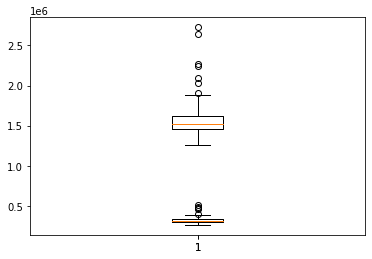

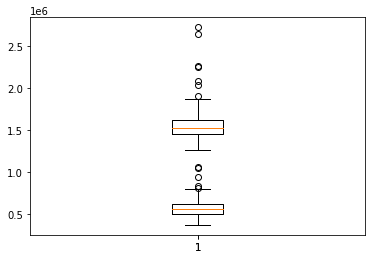

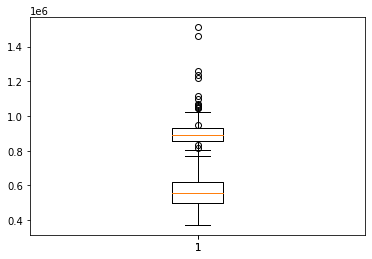

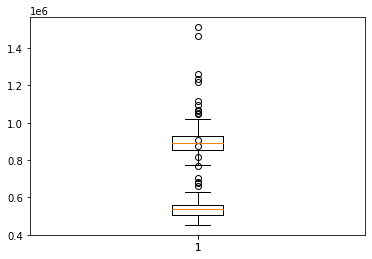

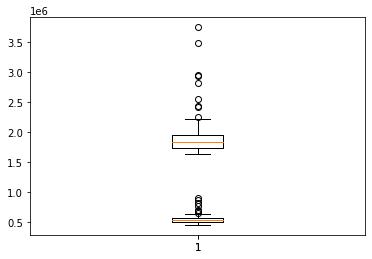

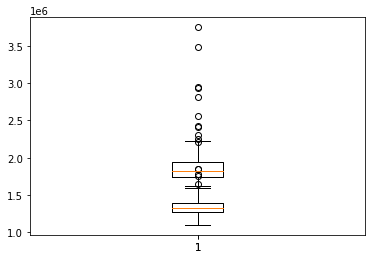

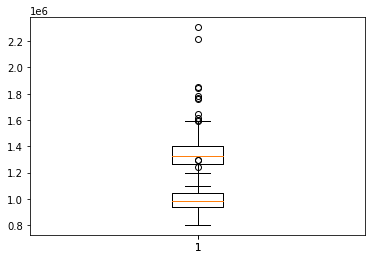

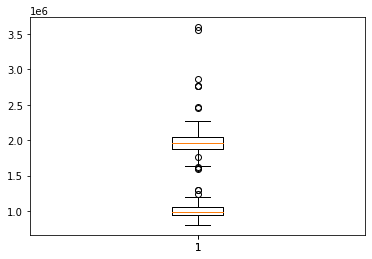

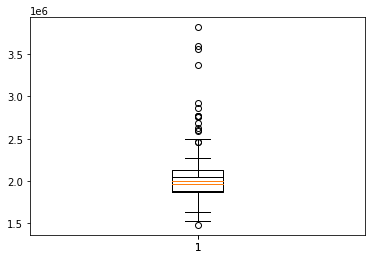

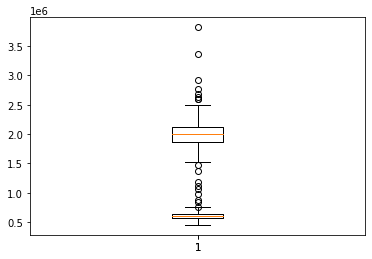

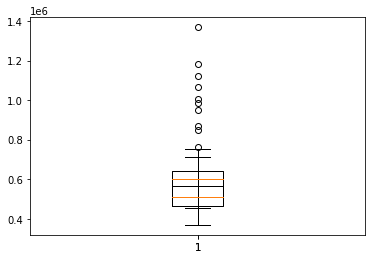

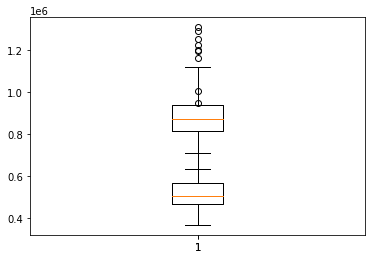

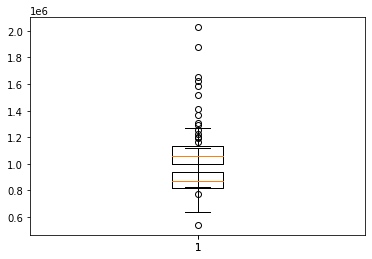

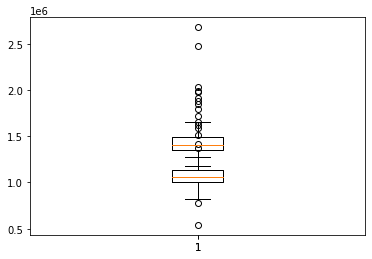

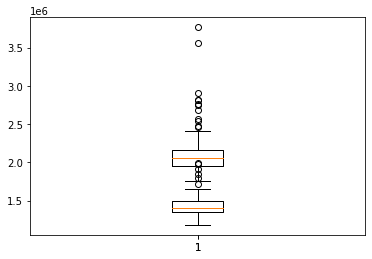

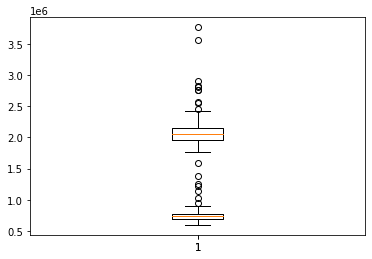

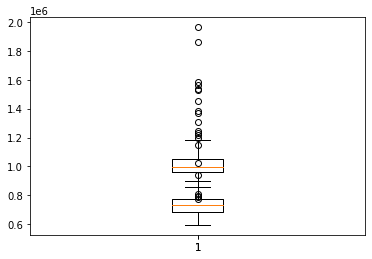

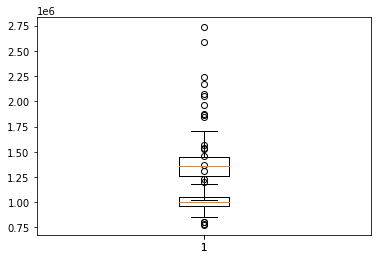

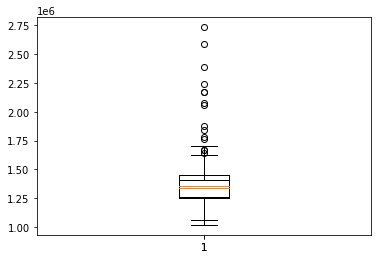

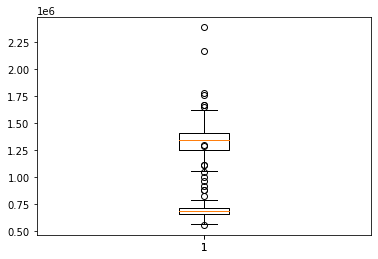

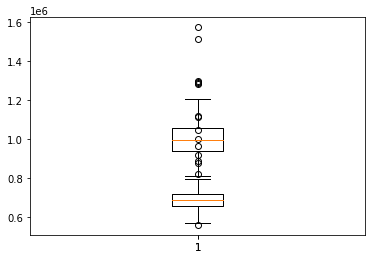

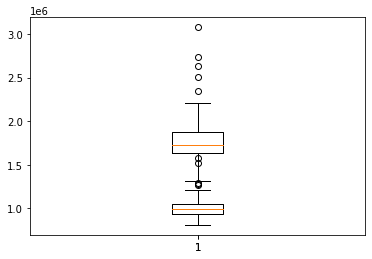

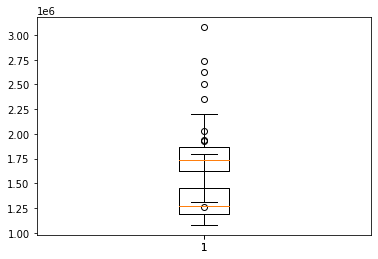

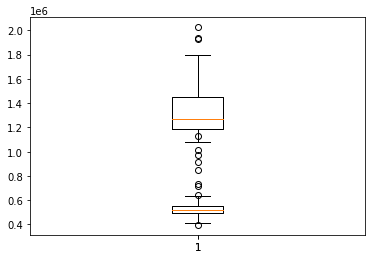

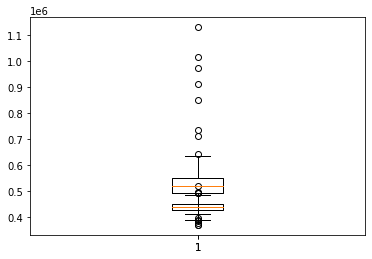

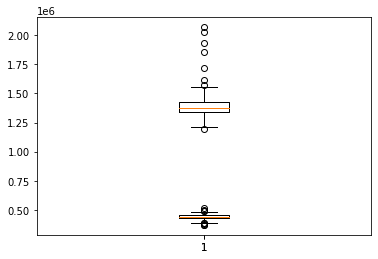

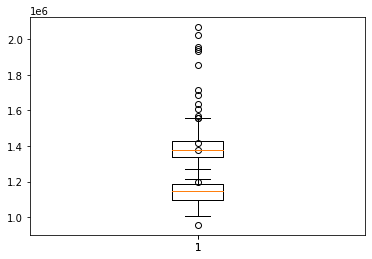

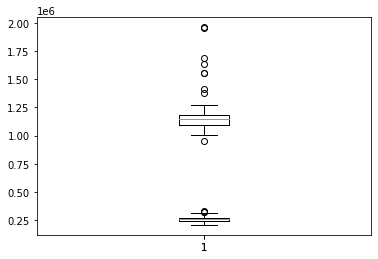

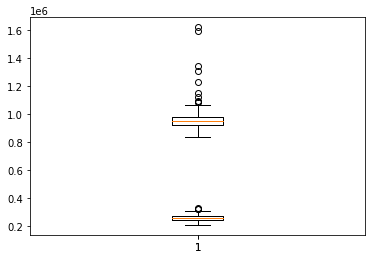

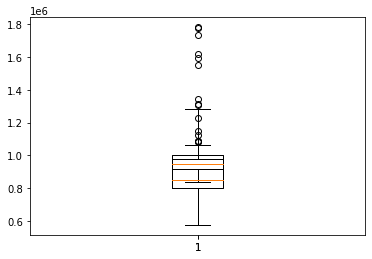

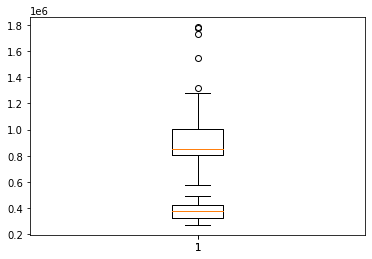

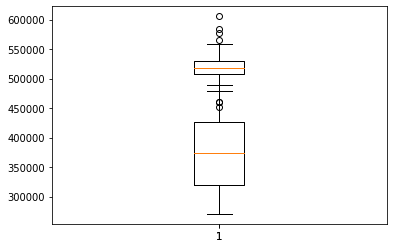

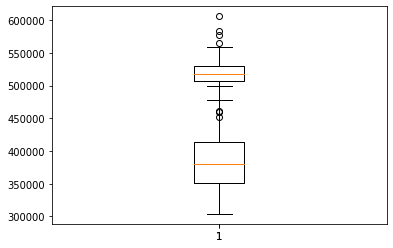

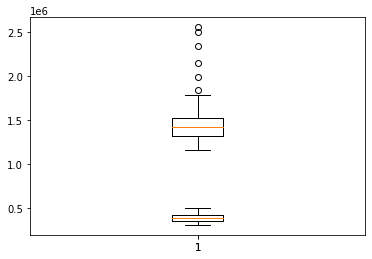

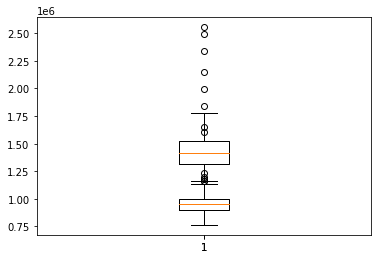

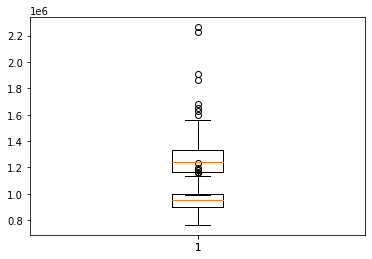

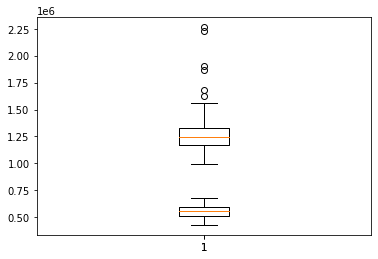

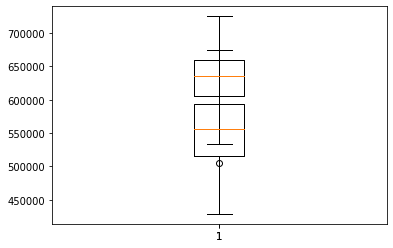

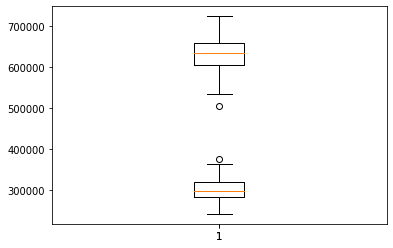

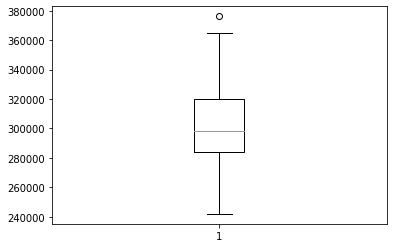

In [ ]:
correlation=data.corr()
sns.heatmap(correlation, yticklabels=False, cmap="viridis");#2nd Row
print("from above table the weekly_sales is more afftected by the location")
print(data)


for i in range(1,45):
  plt.boxplot(store[i]['Weekly_Sales'])
  # plt.scatter(store[i]['Weekly_Sales'],store[i]['Temperature'])
  plt.show()
  q1=float(store[i].Weekly_Sales.quantile([0.25]))
  q3=float(store[i].Weekly_Sales.quantile([0.75]))
  iqr=((q3-q1)*1.5)
  ans1=q1-iqr   
  ans2=q3+iqr
  data=data.loc[(data['Weekly_Sales']<ans1)&(data['Weekly_Sales']>ans2)]
  plt.boxplot(store[i]['Weekly_Sales'])
plt.show()
#from this we can see that the temperature of the are where store[1] is located is affected by the temperature

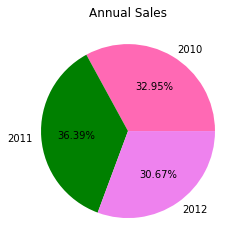

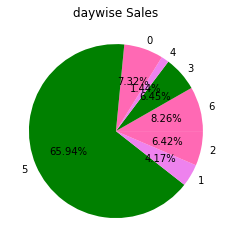

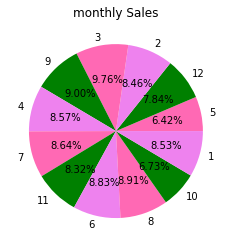

In [ ]:
plt.pie(store[1].groupby('year')['Weekly_Sales'].sum(),labels=store[1]['year'].unique(),autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')
plt.show()
print("\n")
plt.pie(store[1].groupby('weekday')['Weekly_Sales'].sum(),labels=store[1]['weekday'].unique(),autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('daywise Sales')
plt.show()
print("\n")
plt.pie(store[1].groupby('month')['Weekly_Sales'].sum(),labels=store[1]['month'].unique(),autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('monthly Sales')
plt.show()

1555264.3975524476


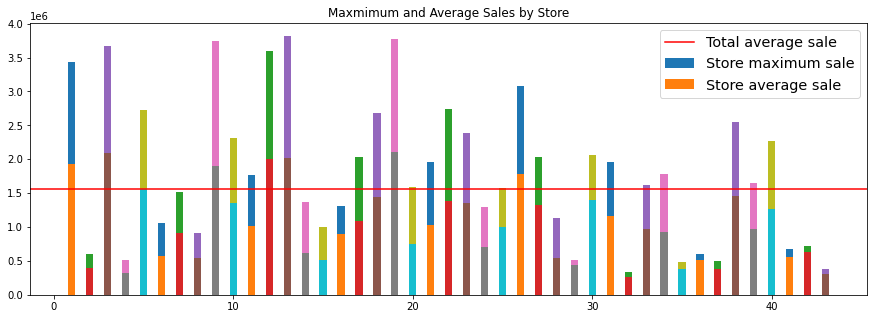

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Maxmimum and Average Sales by Store')
max=[]
mean=[]
weeklysalemean=store[1]['Weekly_Sales'].mean()
weeklysalemean=weeklysalemean
for i in range(1,45):
  max.append(store[i]['Weekly_Sales'].max())
  mean.append(store[i]['Weekly_Sales'].mean())
print(weeklysalemean)
for i in range(1,44):
  plt.bar(i,max[i],width=.4, label='maximum')
  plt.bar(i,mean[i], width=.4, label='median')
plt.axhline(weeklysalemean, color = 'red')
plt.legend(['Total average sale', 'Store maximum sale', 'Store average sale'], fontsize='x-large')
plt.show()

# Normalisation:

In [ ]:
# The maximum absolute scaling
for i in range(1,45):
  store[i]['Weekly_Sales']=store[i]['Weekly_Sales']/store[i]['Weekly_Sales'].abs().max()
  #Thee min max scaling:
  for i in range(1,45):
    store[i]['Weekly_Sales']=(store[i]['Weekly_Sales']-store[i]['Weekly_Sales'].min())/(store[i]['Weekly_Sales'].max()-store[i]['Weekly_Sales'].min())

  #Z-score method:
  from sklearn.preprocessing import StandardScaler
  for i in range(1,45):
    std_scaler = StandardScaler()
    std_scaler.fit([store[i]['Store']])
    std_scaler.transform([store[i]['Weekly_Sales']])



# linear regression:

In [ ]:
# model prediction
model= LinearRegression()

for i in range(1,44):
  train,test=train_test_split(store[i],test_size=0.3,train_size=0.7)
  model.fit(train[['Temperature','Holiday_Flag','Fuel_Price']],train['Weekly_Sales'])
  print(model.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
  with open('walmart_prediction'+str(i),'wb') as f:
    pickle.dump(model,f)

model= LinearRegression(normalize=True)
for i in range(1,44):
  train,test=train_test_split(store[i],test_size=0.3,train_size=0.7)
  model.fit(train[['Temperature','Holiday_Flag','Fuel_Price']],train['Weekly_Sales'])
  print(model.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
  with open('walmart_prediction'+str(i),'wb') as f:
    pickle.dump(model,f)

-0.009090606439903226
0.10770439628841033
0.20348663378831489
0.12739141460336945
-0.7674533761995017
-0.6620271626578014
0.10562169612668015
-0.06879150727993832
0.049639779245271964
-1.5681966053266132
0.11029172157640932
0.08281794850861768
-0.050352005009067335
0.09301399940608401
-0.8979761915570033
0.1479834291920381
0.09633001860328239
0.05051309076926158
-0.006742583071591923
0.015511168890762983
0.0726380182968257
-0.010115902562501278
-0.18736764077208967
-0.033289339631595416
-0.022917081637824133
-0.06612241671497499
0.12344539126065446
0.2284282582697087
-0.08921258437650259
-0.33613150640350575
-0.864752063053587
-0.01780994831215854
-0.1040912121647346
0.06258596295895646
0.2569089975657184
0.5355143877308045
0.05553987529430149
0.3991245899296887
0.0881267465879193
-0.0069592344690478924
-0.10200056202558061
0.12871424950235077
-0.08967184104240267
-0.01192988541623774
-1.1196563904260786
0.2420707333200559
0.24238018924015847
0.06129385672362042
-0.15098410578293997
-0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

0.1617203432672245
-0.08279841382804043
-0.1433383815284388
-0.225996306553228
-0.15347800028986125
-0.21581721567187984
-0.03997318006646977
-0.11630388213794496
-0.09656188136199528
0.05848785301185411
-0.9339676757435942
0.18776910601242347
0.01038189530290945
-0.21934875276505106
-0.08302805061656504
0.07649931865323822
0.33890092008195005
0.312846075310497
0.21498812634510833
0.42950042093534113
-0.0759554864648524
-0.136584118373968
-0.06632110478181197
0.1813192725228796
0.03002237239623229


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

# Ridge:

In [ ]:
model2=Ridge(alpha=1)
for i in range(1,44):
  train,test=train_test_split(store[i],test_size=0.3,train_size=0.7)
  model2.fit(train[['Temperature','Holiday_Flag','Fuel_Price']],train['Weekly_Sales'])
  print(model2.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
  with open('walmart_prediction_ridge'+str(i),'wb') as f:
    pickle.dump(model,f)

0.0010846501982842982
0.08558294891543927
0.3851665361944886
0.22298624186927873
0.1912663424807507
-0.0649937330547945
0.09307351261814556
0.177432015627372
-0.03159209812426278
0.18538473456237026
0.029332083799736064
-0.022309369089618558
0.06756092960318438
0.16921443748816056
-0.07110303106639293
0.061140075135536875
-0.13046634421867132
-0.037665757787090026
0.028235006674286467
-0.009157666822683597
0.0822332934278367
-0.013936510281350012
0.001986617529304846
-0.017622704941935963
0.013021046787684343
-0.11293583916071337
-0.04555113025196822
0.03684701006377278
-0.12512426514172503
0.2986795843278237
0.01733308878684936
0.025049257384160195
-0.007498556682383306
0.1029407741089533
0.27303077580865964
0.44665252555922164
-0.007803689412263504
0.4582001499356284
0.05135058243241819
-0.03025467966408124
-0.1451313075287508
0.08333206319513753
-0.12486648288623892


# Lasso:

In [ ]:
for i in range(1,44):
  model3=Lasso(alpha=1)
  train,test=train_test_split(store[i],test_size=0.3,train_size=0.7)
  model3.fit(train[['Temperature','Holiday_Flag','Fuel_Price']],train['Weekly_Sales'])
  print(model3.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
  with open('walmart_prediction_lasso'+str(i),'wb') as f:
    pickle.dump(model,f)

-0.010374522741157355
-0.01888249696343869
-0.0201552074246103
-0.0007780284484162348
-7.216584146707561e-06
-0.14019306557689593
-0.11582613753942206
-0.22466838310896708
-0.022391409295407394
-0.0013207238826105083
-0.02464717809481698
-0.24832144952512114
-0.07833365232413403
-0.011559812548372461
-0.15115318727013616
-0.06146841523675084
-0.2248165251718106
-0.0007544502247982532
-0.03521703580199498
-0.0068686622308054
-0.09212939074357807
-0.083933550164347
-0.1996518734681667
-0.055798786832359726
-0.000854868006752163
-0.00023019225670606325
-5.034447716800727e-05
0.023527331807520202
-0.8496015651861921
-0.0035699356795122483
-0.0013260058742734504
-0.0025960539379830117
-0.0023065668740152034
-0.19781273388721643
-0.044820966629310455
-0.0005779548957873804
-0.0013881545807070683
-0.053239401459098
-0.06295533723067148
-3.691159917895703e-05
-0.005301969281594987
-0.18584683735897678
-0.06836882403617706


#Score of each model:

In [ ]:
with open('walmart_prediction_lasso1','rb') as f:
    model=pickle.load(f)
    print("lasso:")
    print(model2.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
with open('walmart_prediction_ridge1','rb') as f:
    model=pickle.load(f)
    print("Ridge:")
    print(model3.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))
with open('walmart_prediction1','rb') as f:
    model=pickle.load(f)
    print("linear:")
    print(model.score(test[['Temperature','Holiday_Flag','Fuel_Price']],test['Weekly_Sales']))

lasso:
0.1385716777371725
Ridge:
-0.06836882403617706
linear:
-5.112894311955817


# KNN

In [ ]:
rmse_val=[]
sc = []
miner = 50000
for K in range(1,45):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(train[['Temperature','Holiday_Flag','Fuel_Price']], train['Weekly_Sales'])
    pred=model.predict(test[['Temperature','Holiday_Flag','Fuel_Price']])
    error = sqrt(mean_squared_error(test['Weekly_Sales'],pred))
    if(miner > error):
      miner = error
      Kval = K
    rmse_val.append(error)
    sc.append(model.score(test[['Temperature','Holiday_Flag','Fuel_Price']], test['Weekly_Sales']))
print("Least error value is ",miner," K = ",Kval," Score is ",sc[Kval])


Least error value is  0.17717241843098794  K =  9  Score is  -0.012589445269427069


## Kfold validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for i in range(2,10):
  cv = KFold(n_splits=i, random_state=1, shuffle=True)
  scores = cross_val_score(model, store[i][['Temperature','Holiday_Flag','Fuel_Price']],store[i]['Weekly_Sales'], cv=cv, n_jobs=1)
  print(scores)

[-0.06791499 -0.17109701]
[0.14497697 0.04740636 0.18883706]
[-0.0072235   0.01954147 -0.38710315 -0.15572937]
[ 0.00918844  0.03364832  0.02172961 -0.19812442 -0.29106604]
[ 0.02553815 -0.0049228  -0.02601811 -0.44458147 -0.0528815  -0.10800499]
[0.26290239 0.08848878 0.40712972 0.08490361 0.12539053 0.2076738
 0.35556821]
[ 0.32589041  0.0401249  -0.16287605 -0.0254766  -0.54618874 -0.77637745
 -0.05428192 -0.15512892]
[ 0.22704985 -0.05178381 -0.5015854  -0.3561489   0.07468695 -0.19206814
 -0.25881991 -0.37975312 -0.22190517]


## Dimentionality reduction:

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(store[i][['Temperature','Holiday_Flag','Fuel_Price']],store[i][['Weekly_Sales']],test_size=0.3,train_size=0.7)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(x_test)
print(X_train)
explained_variance = pca.explained_variance_ratio_

explained_variance

      Temperature  Holiday_Flag  Fuel_Price
6124        67.59             0       3.688
6056        53.05             0       3.016
6039        77.42             0       2.624
6140        81.12             0       3.638
6085        86.64             0       3.638
6015        64.37             0       2.770
6130        87.51             0       3.346
6138        85.66             0       3.571
6070        71.34             0       3.810
6067        70.35             0       3.622
6013        54.53             0       2.732
6043        69.46             0       2.725
6126        82.41             0       3.561
6107        43.68             0       3.261
6025        84.90             0       2.637
6033        86.31             0       2.692
6108        52.72             0       3.268
6006        47.31             0       2.572
6083        83.43             0       3.682
6088        87.84             0       3.533
6092        78.97             0       3.355
6078        88.30             0 

array([9.98943745e-01, 8.43019129e-04])

## NEURAL NETWORK:

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

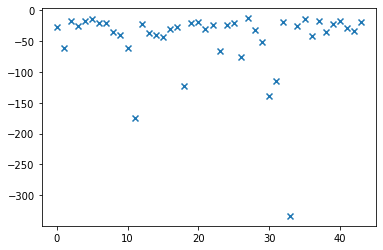

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

ans=[]
for i in range(1,45):
  X_train,X_test,Y_train,Y_test=train_test_split(store[i][['Temperature','Holiday_Flag','Fuel_Price']],store[i][['Weekly_Sales']],test_size=0.3,train_size=0.7)
  clf = MLPRegressor(random_state=1, max_iter=500)
  clf.fit(X_train, Y_train)
  ans.append(clf.score(X_test, Y_test))
plt.scatter(range(len(ans)),ans, marker='x')
plt.show()

## Unsupervised:

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, weekday, month, year]
Index: []


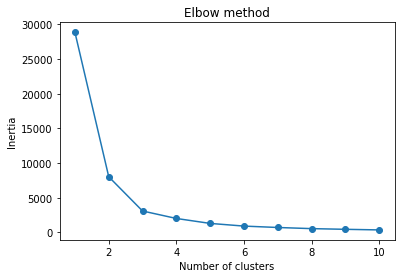

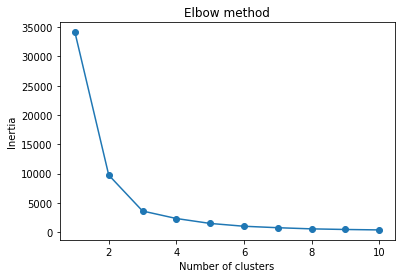

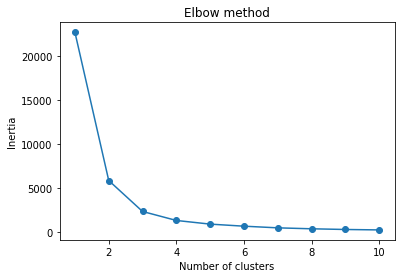

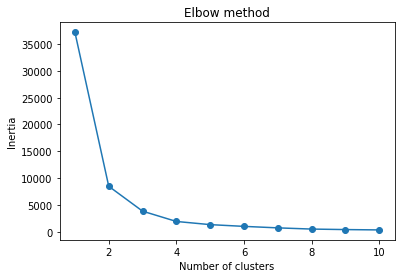

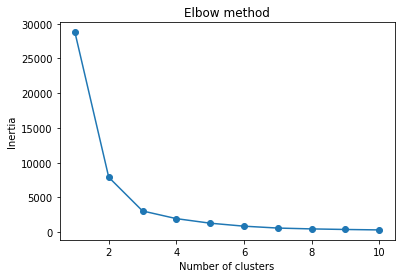

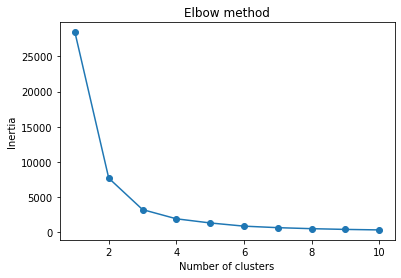

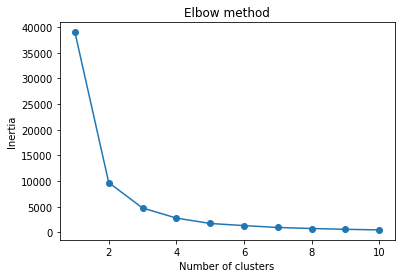

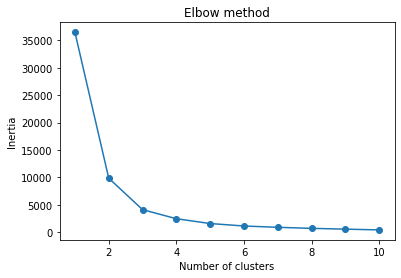

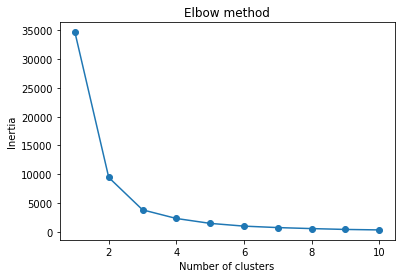

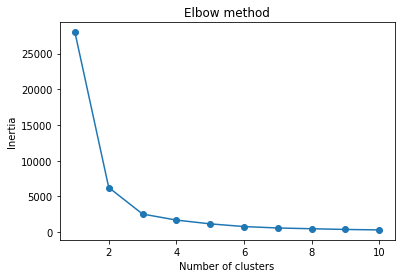

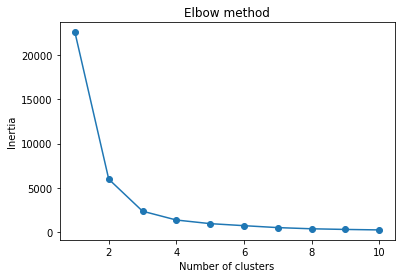

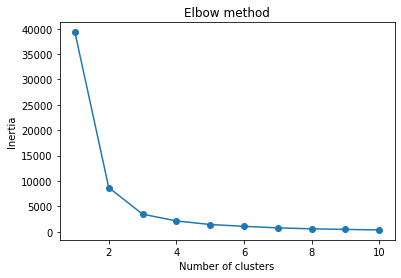

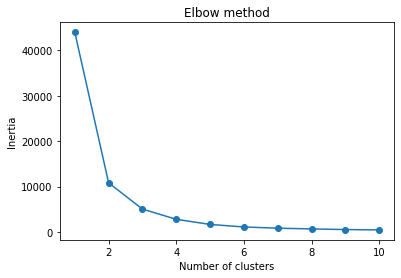

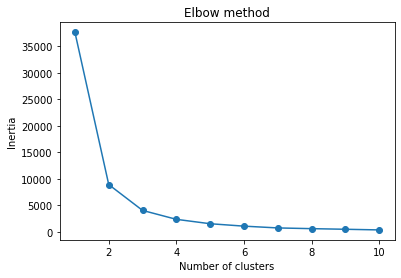

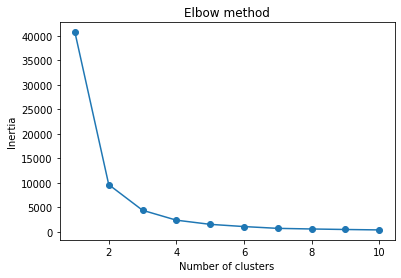

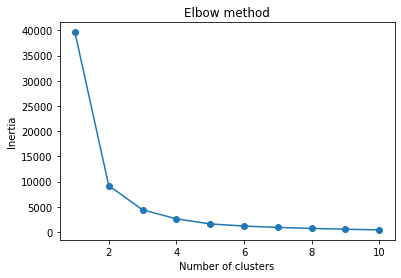

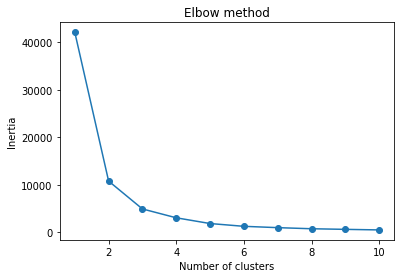

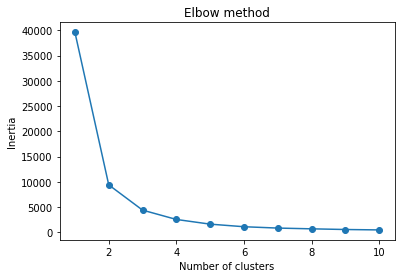

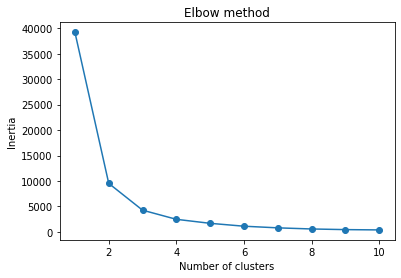

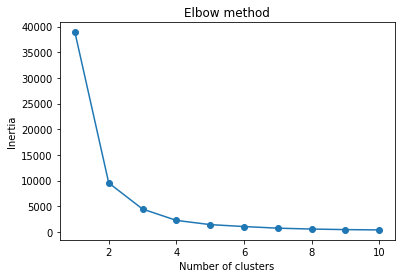

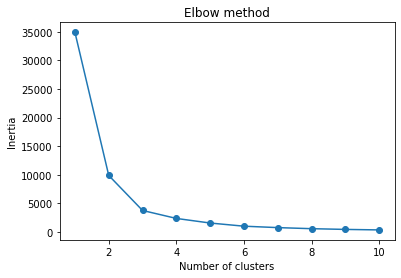

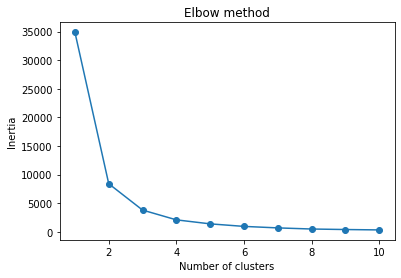

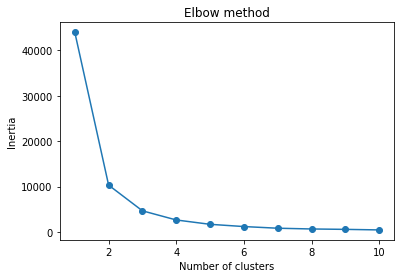

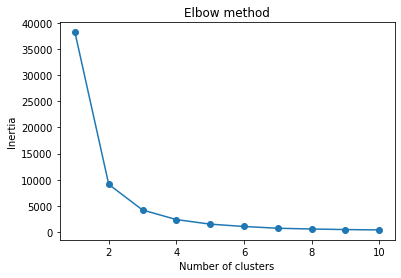

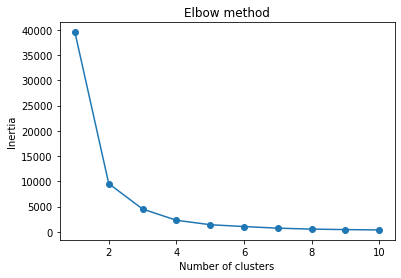

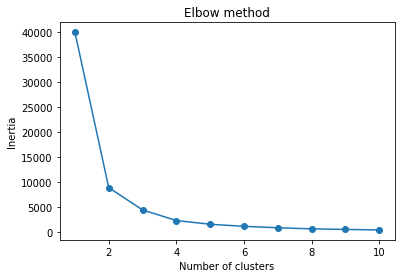

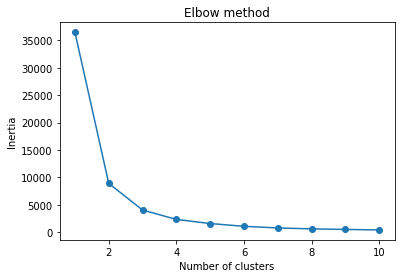

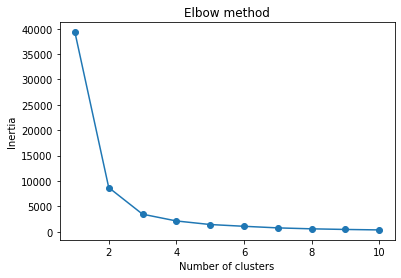

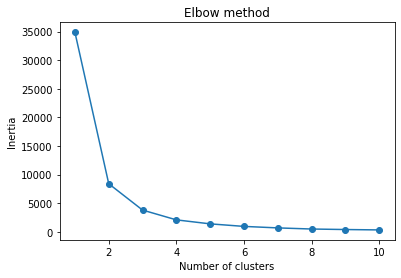

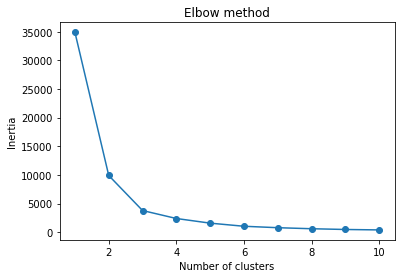

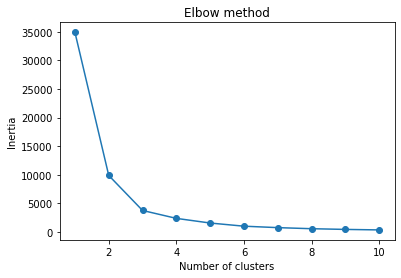

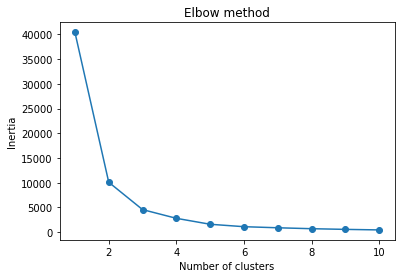

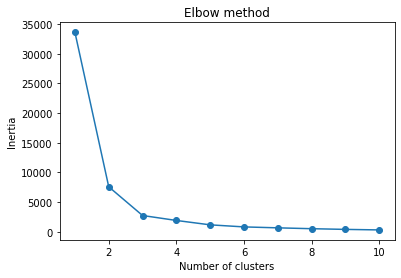

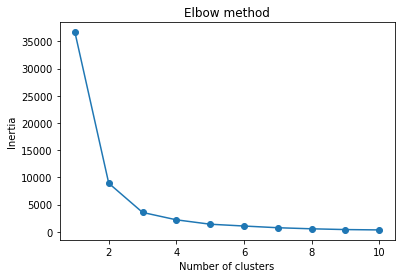

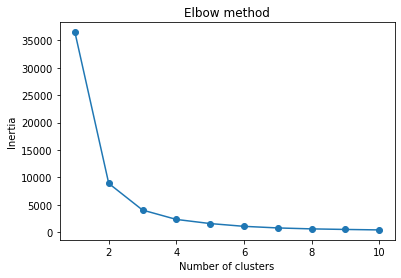

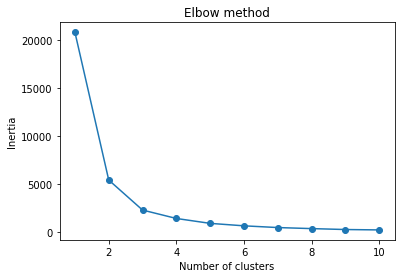

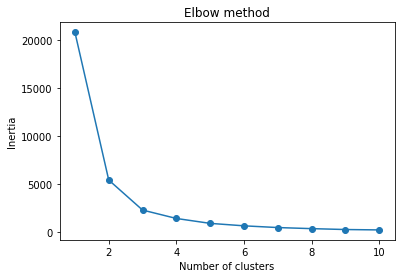

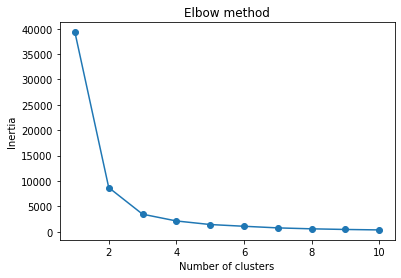

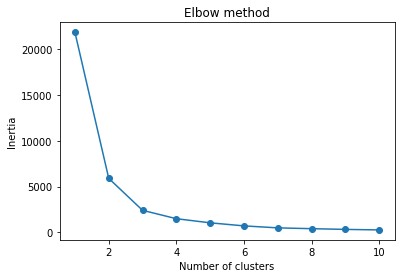

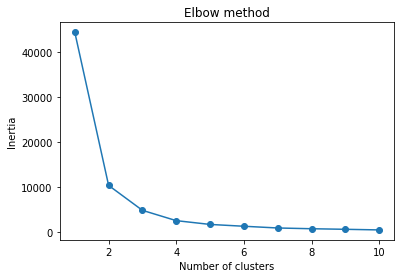

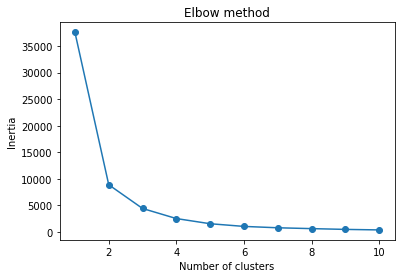

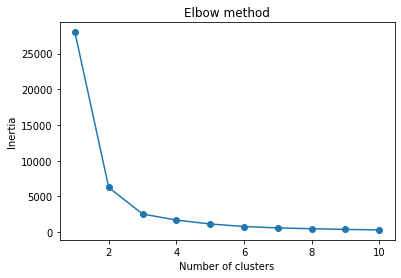

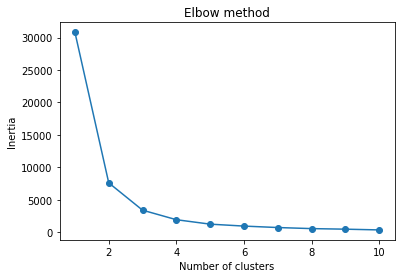

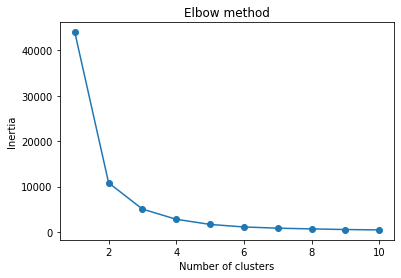

In [ ]:
# KMEAN
print(data)
for i in range (1,45):
  unsupervised=store[i].drop(['Weekly_Sales'], axis=1)

  #kmean

  from sklearn.cluster import KMeans

  inertias = []

  for i in range(1,11):
      kmeans = KMeans(n_clusters=i)
      # print(unsupervised['Temperature','Holiday_Flag'])
      kmeans.fit(unsupervised[['Temperature','Holiday_Flag','Fuel_Price']])
      inertias.append(kmeans.inertia_)

  plt.plot(range(1,11), inertias, marker='o')
  plt.title('Elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()


## SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
sc_y = StandardScaler()
scores=[]
regressor = RandomizedSearchCV(SVR(gamma='auto'),{'kernel' :['linear', 'poly', 'rbf']})

for i in range(1,45):
  X_train,X_test,Y_train,Y_test=train_test_split(store[i][['Temperature','Holiday_Flag','Fuel_Price']],store[i][['Weekly_Sales']],test_size=0.3,train_size=0.7)
  x_train=sc_y.fit_transform(X_train)
  y_train=sc_y.fit_transform(Y_train)
  x_test=sc_y.fit_transform(X_test)
  y_test=sc_y.fit_transform(Y_test)

  regressor.fit(x_train, y_train)
  
  data=pd.DataFrame(regressor.cv_results_)[['param_kernel','mean_test_score']]
  print(data)

NameError: ignored

## DECISION TREE:

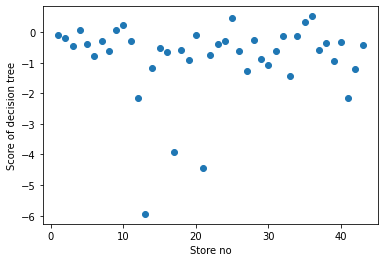

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0) 
scores=[]
for i in range(1,44):
  x_train,x_test,y_train,y_test=train_test_split(store[i][['Temperature','Holiday_Flag','Fuel_Price']],store[i][['Weekly_Sales']],test_size=0.3,train_size=0.7)
  regressor.fit(x_train, y_train)
  scores.append(regressor.score(x_test, y_test))
plt.scatter(np.arange(1,44,1),scores)
plt.xlabel('Store no')
plt.ylabel('Score of decision tree')
plt.show()
